In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

nRowsRead = 20000
df_fraud = pd.read_csv('../input/creditcard.csv',nrows =nRowsRead)
print('data import complete')

data import complete


In [33]:
df_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3062,2621,-0.329525,-0.417036,1.777992,-2.064795,-1.439400,0.031365,-0.366460,0.124618,-2.475148,1.167649,1.431076,-0.644122,-0.239462,-0.176545,0.156157,-0.409163,0.562219,0.137052,-0.218055,-0.352111,-0.196146,-0.299165,0.122600,0.146329,-0.484285,-0.460443,0.002235,0.035744,75.00,0
18517,29562,1.422899,-0.467411,0.216285,-0.685022,-0.873780,-0.761465,-0.451497,-0.208163,-0.809064,0.672060,-0.929545,-0.256638,0.500539,0.023783,0.937438,-1.076439,-0.238926,1.027685,-0.574287,-0.448059,-0.483639,-0.912195,0.049060,-0.097546,0.210814,0.979842,-0.055820,0.005430,10.00,0
13373,23619,-0.204465,1.293748,1.916805,1.740899,-0.024920,-0.391609,0.527470,-0.185174,0.384260,-0.372487,0.656428,-2.506490,2.062693,1.726710,0.947079,-0.516721,0.847968,0.272468,1.256675,0.125305,-0.273165,-0.502758,-0.023665,0.310993,-0.373518,-0.447019,0.140223,0.136777,9.99,0
143,89,-0.589856,0.933070,-0.268073,0.125245,2.396992,3.877945,0.189985,0.960389,-0.230000,0.295110,-0.596572,-0.118181,-0.211614,0.063381,0.179691,-0.608157,-0.159370,0.203084,1.424510,0.401336,-0.154397,-0.174834,-0.201369,1.013439,0.194412,-0.231765,0.541147,0.255374,37.13,0
15557,26953,0.351294,1.448473,-0.810083,2.365492,0.481738,-0.367892,0.520037,0.090635,-1.253514,0.849030,-1.305165,0.275391,1.438701,0.336991,0.108311,0.427887,-0.585525,-0.175786,-0.116984,-0.227506,0.123861,0.244626,0.170425,-0.440886,-0.483582,-0.028911,-0.437276,-0.217649,18.96,0


In [2]:
df_fraud = df_fraud.sample(frac=1)
df_fraud['Class'].value_counts()

0    19915
1       85
Name: Class, dtype: int64

This data is very,very imbalanaced. But that is useful for anomoly detection. It would be bad for fitting models though as it is, it would lead to very poorly fitting models.

<b>Probability Density Functions (PDFs)</b><br><br>
These are calculated as following:  
- Data is sorted into **classes** of varying **class widths** e.g between 1-2,2-3,3-4, until the class is infintely small
- The frequency of the occurences of the event which we're observing in each class are used to determine **relative frequency** (frequency / sum(frequency))
- The **relative frequency density** is given by (relative frequency/class width)

these points (class width for x,relative frequency density for y) are then plotted like a histogram. As the class sizes reduce smaller and smaller, the plotted line becomes smoother and smoother.<br>

now the curved line can be used to determine what the probability is that we would see the observed value in this population. 


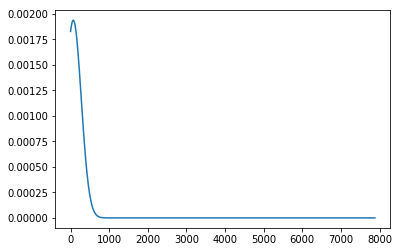

In [3]:
amount = df_fraud['Amount'].sort_values()
fit_amount = stats.norm.pdf(amount, np.mean(amount), np.std(amount))
plt.plot(amount,fit_amount)

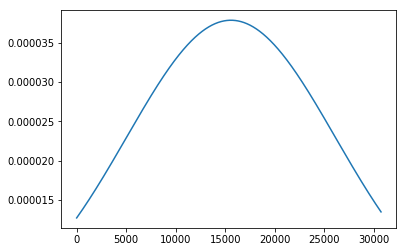

In [5]:
time = df_fraud['Time'].sort_values()
fit_time = stats.norm.pdf(time, np.mean(time), np.std(time))
plt.plot(time,fit_time)

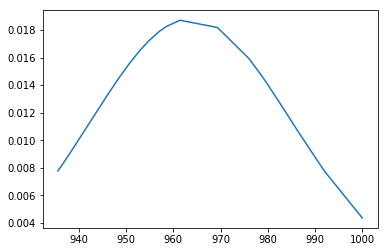

In [32]:
#the smaller the class width we observe, the higher the probability 
small_amount = df_fraud.loc[(df_fraud['Amount'] <= 1000) & (df_fraud['Amount'] > 930)]['Amount'].sort_values()
fit_small_amount = stats.norm.pdf(small_amount, np.mean(small_amount), np.std(small_amount))
plt.plot(small_amount,fit_small_amount)

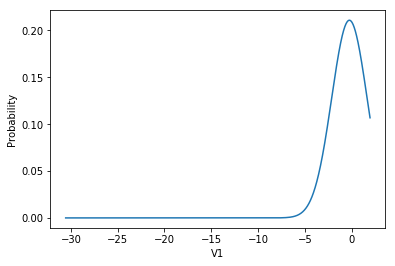

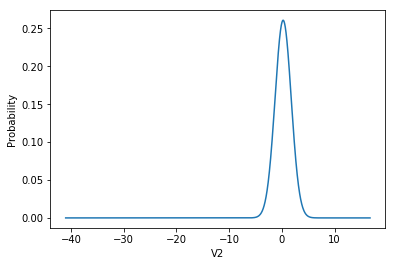

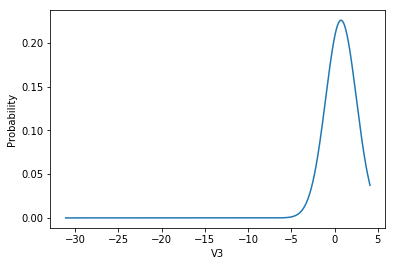

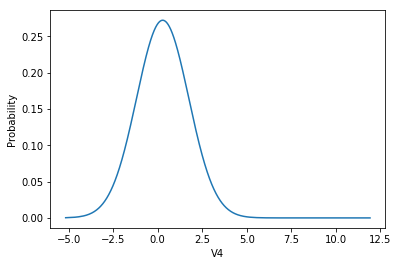

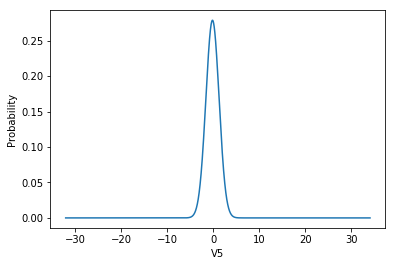

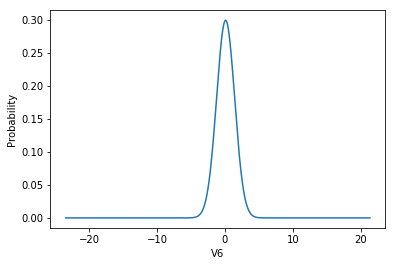

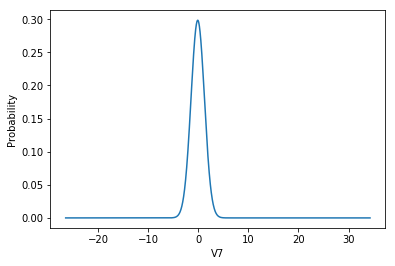

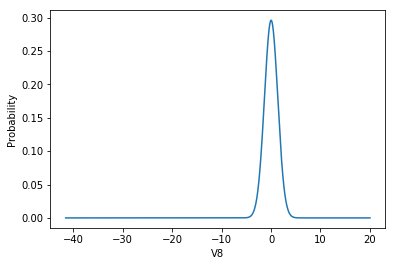

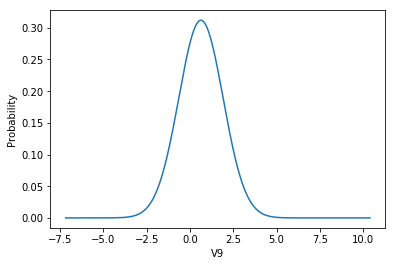

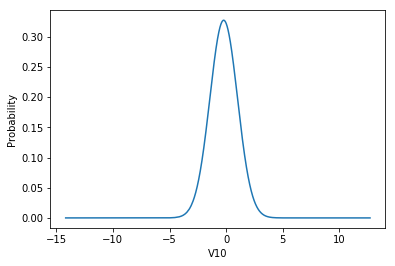

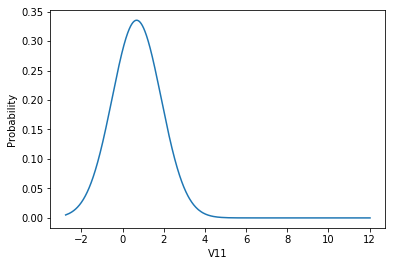

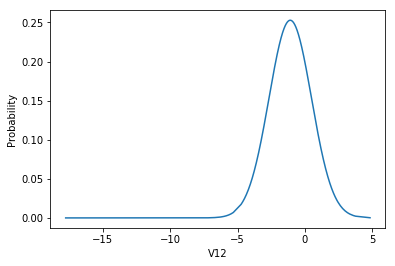

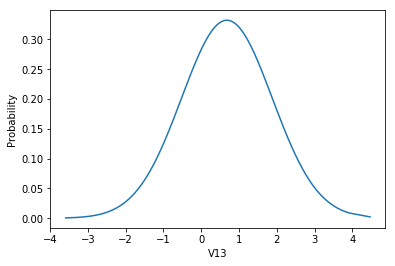

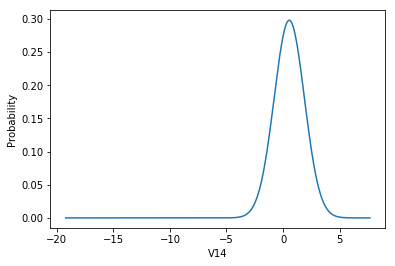

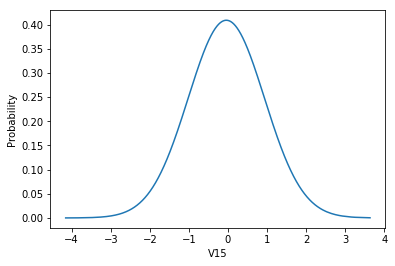

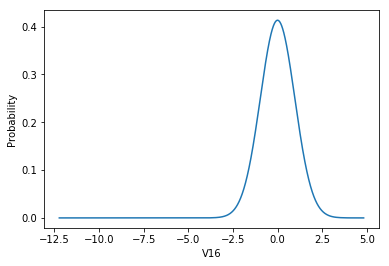

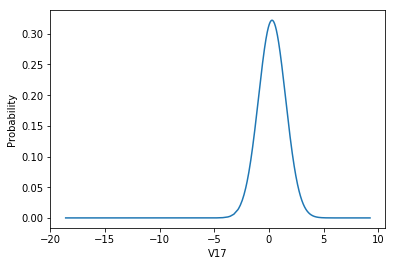

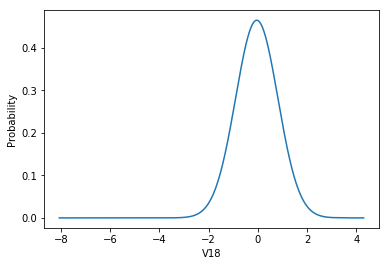

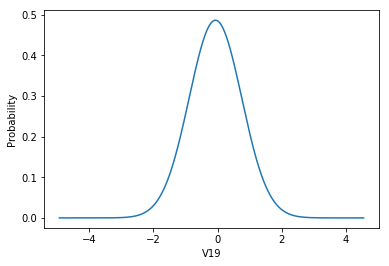

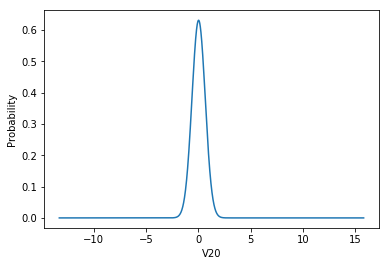

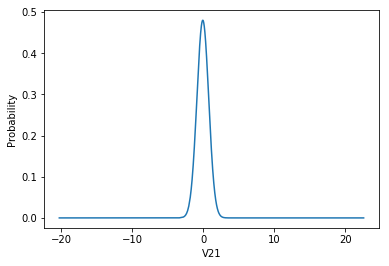

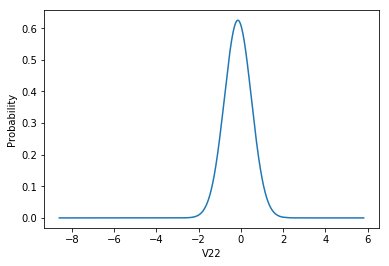

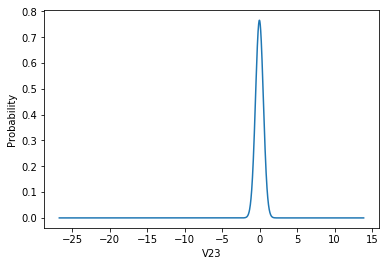

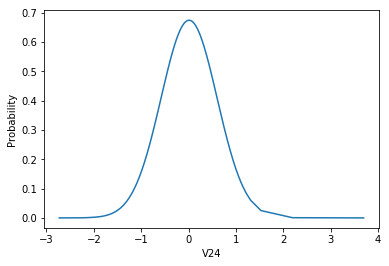

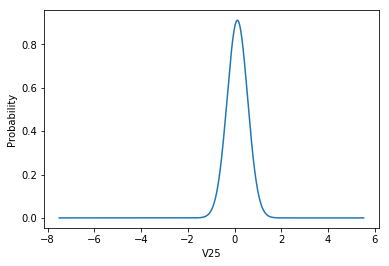

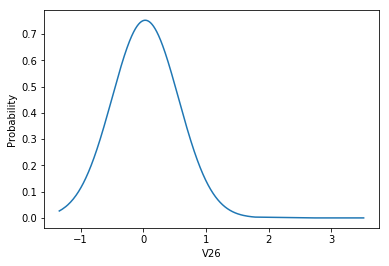

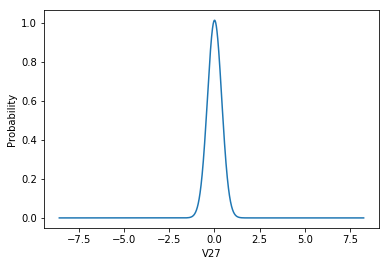

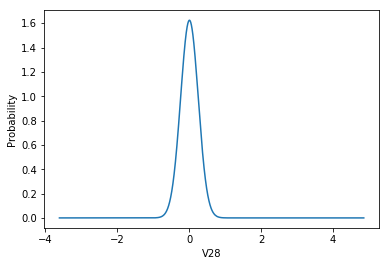

In [38]:
#V features probability density function graphs
v_columns = ['V'+str(x) for x in range(1,29)]

for column in v_columns:
    v_col = df_fraud[column].sort_values()
    fit_col = stats.norm.pdf(v_col,np.mean(v_col),np.std(v_col))
    plt.plot(v_col,fit_col)
    plt.xlabel(column)
    plt.ylabel('Probability')
    plt.show()